
<br><br>

***

<br><br>


<center><font size="7" color="purple">Chapter 4 Dates, Locators and Formatters</font></center>

<br><br>

***


<br><br><br><br>

<pre>
    1)  dates
    2) Locators and Formatters
</pre>

<br><br><br><br>

<center><strong>Locators</strong></center>
<table border="1">
<colgroup>
<col width="30%" />
<col width="70%" />
</colgroup>
<thead>

<tr>
    <th>Locator Class</th>
    <th>Description</th>
</tr>
</thead>
    
<tbody>
<tr><td>NullLocator</td>
<td>No ticks</td>
</tr>
<tr><td>FixedLocator</td>
<td>Tick locations are fixed</td>
</tr>
<tr><td>IndexLocator</td>
<td>Locator for index plots (e.g., where x = range(len(y)))</td>
</tr>
<tr>
    <td>LinearLocator</td>
    <td>Evenly spaced from min to max</td>
</tr>
<tr>
    <td>LogLocator</td>
    <td>Logarithmically ticks from min to max</td>
</tr>
<tr>
    <td>MultipleLocator</td>
    <td>Ticks and range are a multiple of base</td>
</tr>
<tr>
    <td>MaxNLocator</td>
    <td>Finds N ticks at nice locations</td>
</tr>
</tbody>
</table>

<center><strong>Formatters</strong></center>
<table border="1">
<colgroup>
<col width="30%" />
<col width="70%" />
</colgroup>
<thead>

<tr>
    <th>Formatter Class</th>
    <th>Description</th>
</tr>
</thead>
    
<tbody>
<tr><td>NullFormatter</td>
<td>No labels</td>
</tr>
<tr><td>FixedFormatter</td>
<td>Set strings manually</td>
</tr>
<tr><td>IndexFormatter</td>
<td>Set from a list of labels</td>
</tr>
<tr>
    <td>FuncFormatter</td>
    <td>User-defined function sets the labels</td>
</tr>
<tr>
    <td>LogFormatter</td>
    <td>Default formatter for log axes</td>
</tr>
<tr>
    <td>FormatStrFormatter</td>
    <td>Use a format string for each value</td>
</tr>
<tr>
    <td>ScalarFormatter</td>
    <td>(Default) Formatter for scalar values</td>
</tr>
</tbody>
</table>

note pandas datetime is different from datetime, there is an example in Chapter 3 Annotations

In [24]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import numpy as np 
import datetime as dt 

to remove all ticks set the locator and formatter to null

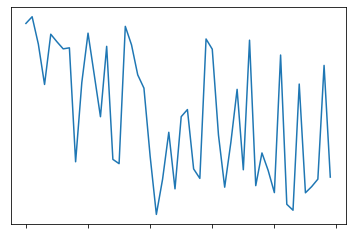

In [25]:

ax = plt.axes()
ax.plot(np.random.rand(50))

ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_formatter(plt.NullFormatter())

datetime has useful to create ranges

In [26]:
dates = [dt.datetime.today() + dt.timedelta(days=i) for i in range(10)] 
values = np.random.rand(len(dates))
print("One date time object ", dates[0])
print("Ranging from ", dates[0].strftime("%m/%d/%Y"), " to ", dates[9].strftime("%m/%d/%Y"))

One date time object  2021-12-17 09:52:34.636849
Ranging from  12/17/2021  to  12/26/2021


matplotlib has a dates class...and a timedelta class

In [27]:
date2_1 = dt.datetime(2008, 9, 23)
date2_2 = dt.datetime(2008, 10, 3)
delta2 = dt.timedelta(days=1)                           # <class 'datetime.timedelta'>
dates2 = mpl.dates.drange(date2_1, date2_2, delta2)  # dates2 is a numpy.ndarray of numpy.float64
y2 = np.random.rand(len(dates2))

DateFormatter

In [28]:
dateFmt = mpl.dates.DateFormatter('%Y-%m-%d')

Day and Hour Locator.. note we havent done any plotting yet

In [29]:
daysLoc = mpl.dates.DayLocator()
hoursLoc = mpl.dates.HourLocator(interval=6)   # every 6 hours, will be the minor formatter, the small ticks

Now create dates, locators, formatters for a second axes

In [30]:
date1_1 = dt.datetime(2008, 9, 23)
date1_2 = dt.datetime(2009, 2, 16)
delta1 = dt.timedelta(days=10)
dates1 = mpl.dates.drange(date1_1, date1_2, delta1)
y1 = np.random.rand(len(dates1))
monthsLoc = mpl.dates.MonthLocator(interval=2)         # every 2 months
weeksLoc = mpl.dates.WeekdayLocator()
monthsFmt = mpl.dates.DateFormatter('%B')           # October November December

Now do the actual plotting

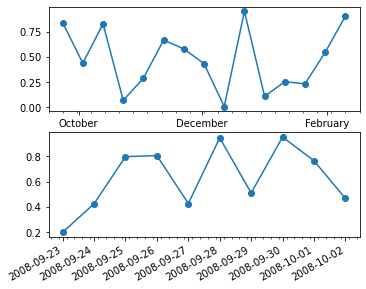

In [31]:
fig = plt.figure()
ax2 = fig.add_subplot(212)

ax2.plot_date(dates2, y2, linestyle='-')

ax2.xaxis.set_major_formatter(dateFmt)

ax2.xaxis.set_major_locator(daysLoc)
ax2.xaxis.set_minor_locator(hoursLoc)


fig.autofmt_xdate(bottom=0.08)    # scrunch the height
fig.subplots_adjust(left=0.18)    # scrunches the width
ax1 = fig.add_subplot(211)
ax1.plot_date(dates1, y1, linestyle='-')
ax1.xaxis.set_major_locator(monthsLoc)
ax1.xaxis.set_minor_locator(weeksLoc)
ax1.xaxis.set_major_formatter(monthsFmt)
plt.show()

note plot_date and plot both work
als note you can plot first, and set locators second

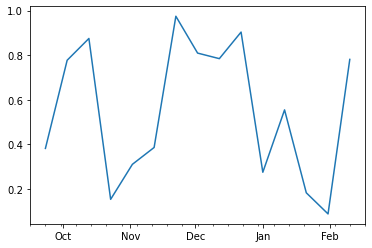

In [32]:

#  basic example of Oct, Nov, Dec, Jan, Feb

fig = plt.figure()
ax = fig.add_subplot(111)

date1_1 = dt.datetime(2008, 9, 23)
date1_2 = dt.datetime(2009, 2, 16)
delta1 = dt.timedelta(days=10)       # special object to contain the delta
dates1 = mpl.dates.drange(date1_1, date1_2, delta1)   # creates the date range
y1 = np.random.rand(len(dates1))


ax.plot(dates1, y1, linestyle='-')

monthsLoc = mpl.dates.MonthLocator()     # figures out the months for you
weeksLoc = mpl.dates.WeekdayLocator()    # figures out the weeks for you
ax.xaxis.set_major_locator(monthsLoc)    # big ticks for lables
ax.xaxis.set_minor_locator(weeksLoc)     # small ticks
monthsFmt = mpl.dates.DateFormatter('%b')   # lower case for  "Feb" upper case for "February"
ax.xaxis.set_major_formatter(monthsFmt)   # format labels on big ticks
plt.show()

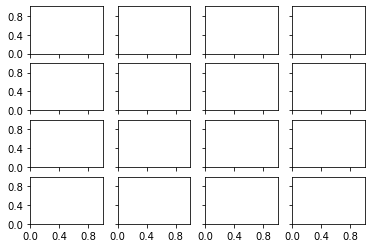

In [33]:
# MaxNLocator can be used to let matplotlib figure out the x and  y units
fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)

for axi in ax.flat:
           axi.xaxis.set_major_locator(plt.MaxNLocator(3))
           axi.yaxis.set_major_locator(plt.MaxNLocator(3))
           